# 장비 센서 데이터 EDA (Exploratory Data Analysis)

## 목적
장비 센서 데이터를 기반으로 이상 신호 감지 및 비정상 작동 진단 분류를 위한 탐색적 데이터 분석

## 데이터 정보
- **Train 데이터**: 21,693개 샘플, 52개 Feature (X_01 ~ X_52), 21개 클래스 (0-20)
- **Test 데이터**: 예측 대상 데이터
- **평가 지표**: Macro-F1 Score


In [16]:
# 필요한 라이브러리 import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# 시각화 스타일 설정
plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
sns.set_palette("husl")
%matplotlib inline

# 데이터 로드
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

print("=" * 60)
print("데이터 기본 정보")
print("=" * 60)
print(f"Train 데이터 shape: {train.shape}")
print(f"Test 데이터 shape: {test.shape}")
print(f"\nTrain 컬럼: {list(train.columns)}")
print(f"\nTrain 데이터 타입:\n{train.dtypes.value_counts()}")
print(f"\n결측치 확인:\n{train.isnull().sum().sum()} (Train)")
print(f"{test.isnull().sum().sum()} (Test)")

# 데이터 미리보기
print("\n" + "=" * 60)
print("Train 데이터 처음 5행")
print("=" * 60)
train.head()




데이터 기본 정보
Train 데이터 shape: (21693, 54)
Test 데이터 shape: (15004, 53)

Train 컬럼: ['ID', 'X_01', 'X_02', 'X_03', 'X_04', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09', 'X_10', 'X_11', 'X_12', 'X_13', 'X_14', 'X_15', 'X_16', 'X_17', 'X_18', 'X_19', 'X_20', 'X_21', 'X_22', 'X_23', 'X_24', 'X_25', 'X_26', 'X_27', 'X_28', 'X_29', 'X_30', 'X_31', 'X_32', 'X_33', 'X_34', 'X_35', 'X_36', 'X_37', 'X_38', 'X_39', 'X_40', 'X_41', 'X_42', 'X_43', 'X_44', 'X_45', 'X_46', 'X_47', 'X_48', 'X_49', 'X_50', 'X_51', 'X_52', 'target']

Train 데이터 타입:
float64    52
object      1
int64       1
Name: count, dtype: int64

결측치 확인:
0 (Train)
0 (Test)

Train 데이터 처음 5행


,ID,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,...,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,target
0,TRAIN_00000,0.016,0.242994,0.538536,0.522295,0.374494,0.555348,0.639091,0.494800,0.584233,...,0.435885,0.555359,0.751714,0.376801,0.466993,0.527585,0.598101,0.312160,0.582797,0
1,TRAIN_00001,0.019,0.240380,0.517223,0.538976,0.371149,0.693825,0.663667,0.530931,0.577200,...,0.479859,0.693855,0.748955,0.356118,0.613461,0.508069,0.569814,0.313351,0.570513,20
2,TRAIN_00002,0.012,0.248946,0.547109,0.466713,0.415830,0.656887,0.681782,0.580773,0.527069,...,0.416115,0.656884,0.750059,0.417200,0.525393,0.551947,0.639860,0.342627,0.573139,1
3,TRAIN_00003,0.013,0.245877,0.527870,0.515534,0.379199,0.594391,0.663816,0.494931,0.581796,...,0.436761,0.594364,0.746297,0.374659,0.694290,0.532705,0.581142,0.316417,0.562656,19
4,TRAIN_00004,0.024,0.239237,0.566087,0.514384,0.378451,0.610543,0.644811,0.508567,0.593614,...,0.422407,0.610526,0.749565,0.372742,0.565549,0.535573,0.580484,0.314982,0.591692,15


## 2. 타겟 변수 분석


In [17]:
# 타겟 변수 기본 정보
print("=" * 60)
print("타겟 변수 분석")
print("=" * 60)
print(f"고유 클래스 개수: {train['target'].nunique()}")
print(f"클래스 범위: {train['target'].min()} ~ {train['target'].max()}")
print(f"\n각 클래스별 개수:")
target_counts = train['target'].value_counts().sort_index()
print(target_counts)

print(f"\n클래스 불균형 여부: {'균형' if target_counts.nunique() == 1 else '불균형'}")

타겟 변수 분석
고유 클래스 개수: 21
클래스 범위: 0 ~ 20

각 클래스별 개수:
target
0     1033
1     1033
2     1033
3     1033
4     1033
5     1033
6     1033
7     1033
8     1033
9     1033
10    1033
11    1033
12    1033
13    1033
14    1033
15    1033
16    1033
17    1033
18    1033
19    1033
20    1033
Name: count, dtype: int64

클래스 불균형 여부: 균형


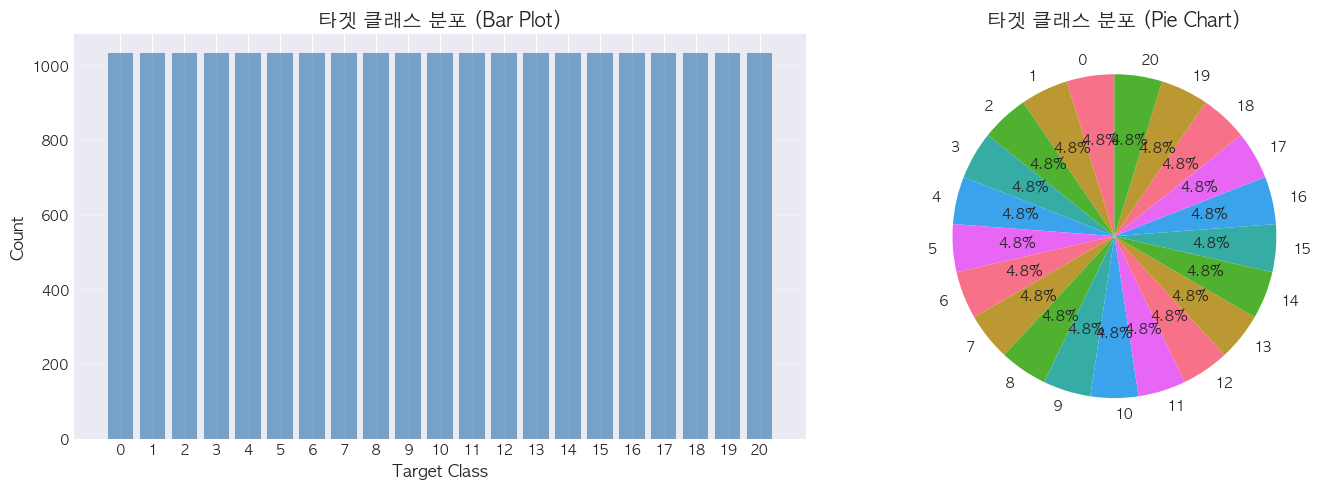

모든 클래스가 동일한 개수: True
각 클래스별 개수: 1033


In [18]:
# 타겟 변수 분포 시각화
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Count plot
target_counts = train['target'].value_counts().sort_index()
axes[0].bar(target_counts.index, target_counts.values, color='steelblue', alpha=0.7)
axes[0].set_xlabel('Target Class', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('타겟 클래스 분포 (Bar Plot)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)
axes[0].set_xticks(target_counts.index)

# Pie chart
axes[1].pie(target_counts.values, labels=target_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('타겟 클래스 분포 (Pie Chart)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"모든 클래스가 동일한 개수: {target_counts.nunique() == 1}")
print(f"각 클래스별 개수: {target_counts.iloc[0] if target_counts.nunique() == 1 else '다름'}")

## 3. Feature 기본 통계 분석


In [19]:
# Feature 기본 통계 분석
feature_cols = [col for col in train.columns if col.startswith('X_')]

print("=" * 60)
print("Feature 기본 통계 분석")
print("=" * 60)
print(f"Feature 개수: {len(feature_cols)}")
print(f"Feature 컬럼명: {feature_cols[:10]}... ({len(feature_cols)}개)")

# 기술통계량
stats_df = train[feature_cols].describe().T
stats_df['missing'] = train[feature_cols].isnull().sum()
stats_df['zero_count'] = (train[feature_cols] == 0).sum()

print(f"\n결측치: {stats_df['missing'].sum()}개")
print(f"\n각 Feature의 통계 요약:")
print(f"- 평균 범위: {stats_df['mean'].min():.4f} ~ {stats_df['mean'].max():.4f}")
print(f"- 표준편차 범위: {stats_df['std'].min():.4f} ~ {stats_df['std'].max():.4f}")
print(f"- 최소값 범위: {stats_df['min'].min():.4f} ~ {stats_df['min'].max():.4f}")
print(f"- 최대값 범위: {stats_df['max'].min():.4f} ~ {stats_df['max'].max():.4f}")

stats_df.head(10)

Feature 기본 통계 분석
Feature 개수: 52
Feature 컬럼명: ['X_01', 'X_02', 'X_03', 'X_04', 'X_05', 'X_06', 'X_07', 'X_08', 'X_09', 'X_10']... (52개)

결측치: 0개

각 Feature의 통계 요약:
- 평균 범위: 0.0180 ~ 50.9563
- 표준편차 범위: 0.0048 ~ 17.7750
- 최소값 범위: -0.2350 ~ 0.0000
- 최대값 범위: 0.0370 ~ 100.2410


,count,mean,std,min,25%,50%,75%,max,missing,zero_count
X_01,21693.0,0.017989,0.004794,-0.003,0.015000,0.018000,0.021000,0.037,0,6
X_02,21693.0,0.258061,0.064098,0.000,0.244223,0.247364,0.251002,1.000,0,1
X_03,21693.0,0.533411,0.057962,0.000,0.510506,0.535398,0.560651,1.000,0,1
X_04,21693.0,0.510776,0.082500,0.000,0.507370,0.520045,0.533285,1.000,0,1
X_05,21693.0,0.421508,0.168995,0.000,0.363789,0.378157,0.393900,1.000,0,1
X_06,21693.0,0.600059,0.082645,0.000,0.555003,0.604917,0.651660,1.000,0,1
X_07,21693.0,0.618569,0.139561,0.000,0.642250,0.653100,0.662580,1.000,0,1
X_08,21693.0,0.534465,0.153934,0.000,0.480822,0.504495,0.540172,1.000,0,1
X_09,21693.0,0.550514,0.134451,0.000,0.562856,0.578888,0.593727,1.000,0,1
X_10,21693.0,0.517199,0.092376,0.000,0.463122,0.520103,0.578334,1.000,0,1


## 4. Feature 분포 분석


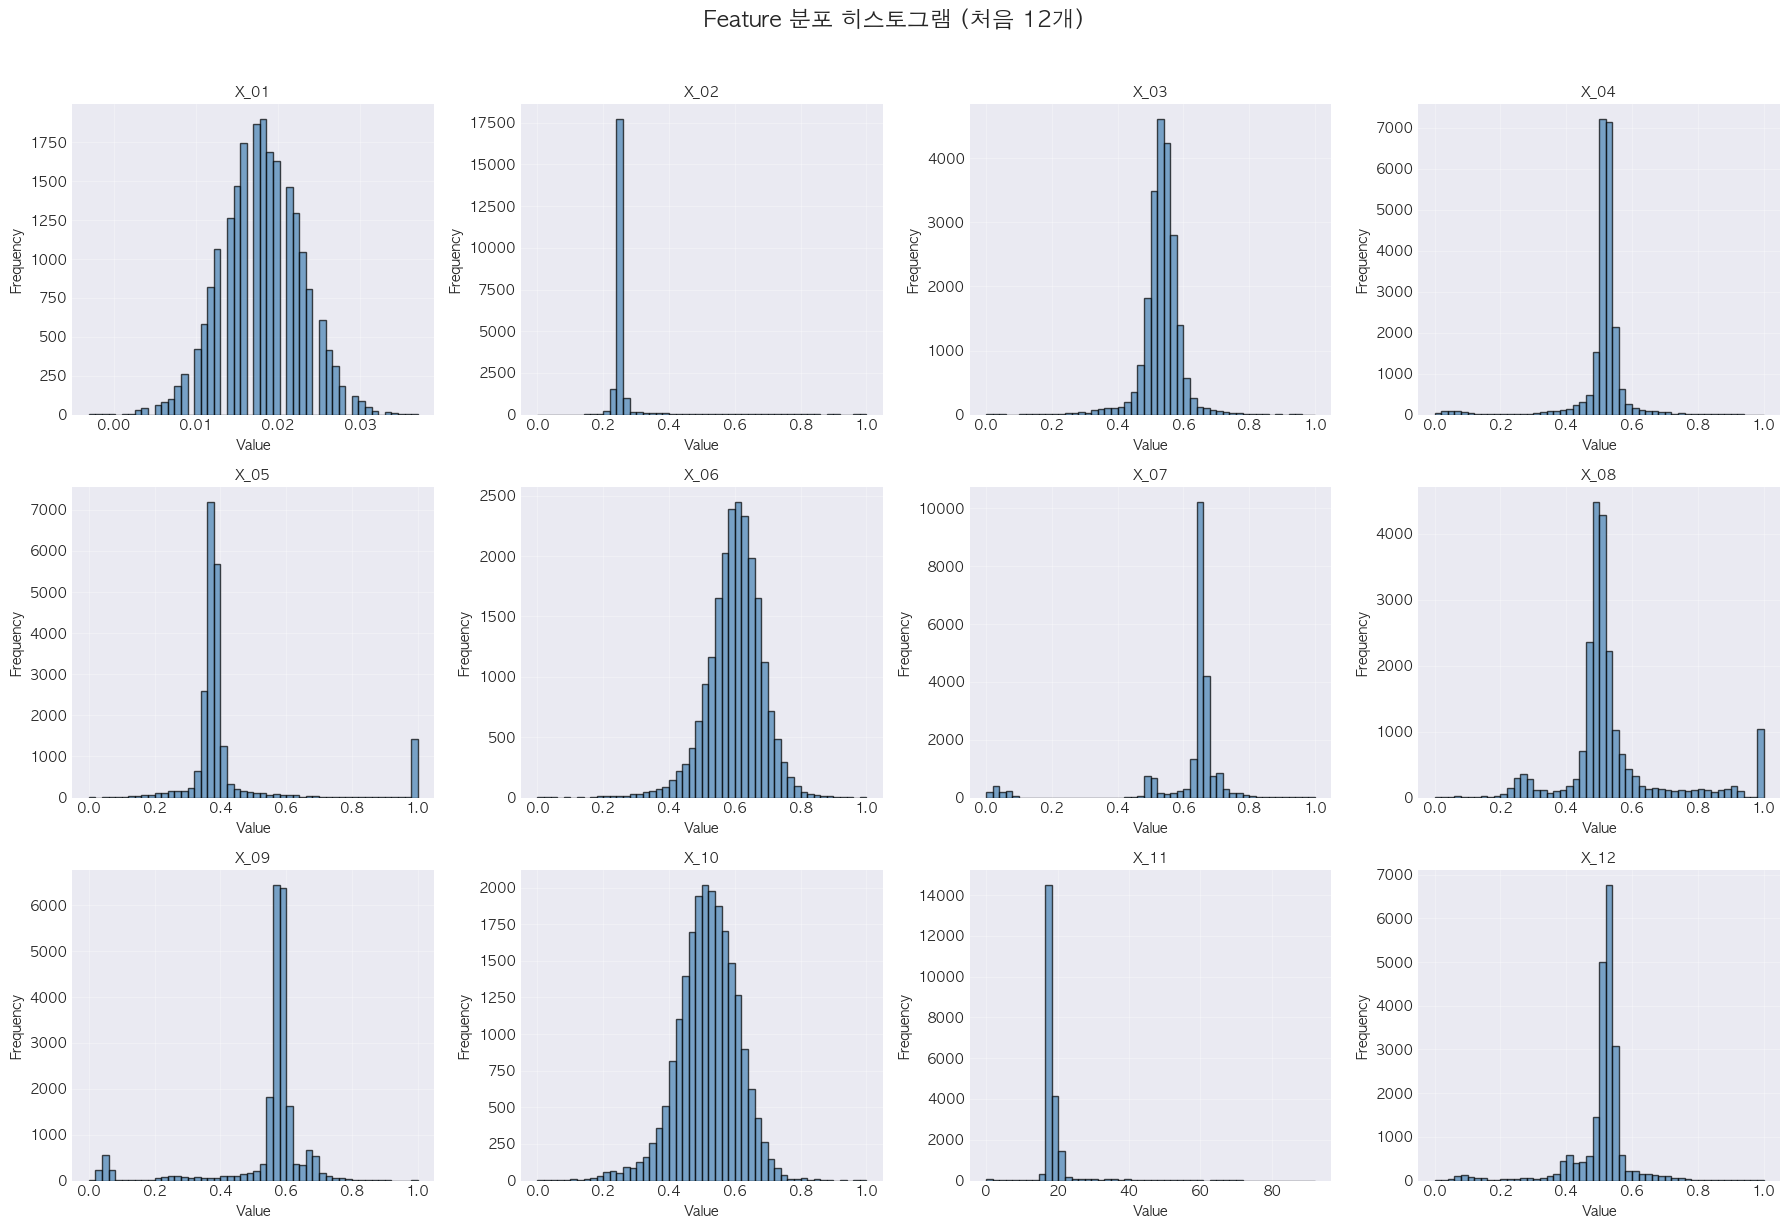

In [20]:
# Feature 분포 분석 - 히스토그램 그리드
feature_cols = [col for col in train.columns if col.startswith('X_')]
n_features = len(feature_cols)

# 처음 12개 Feature의 히스토그램
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(feature_cols[:12]):
    axes[idx].hist(train[col], bins=50, color='steelblue', alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Value')
    axes[idx].set_ylabel('Frequency')
    axes[idx].grid(alpha=0.3)

plt.suptitle('Feature 분포 히스토그램 (처음 12개)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [21]:
train.describe()

,X_01,X_02,X_03,X_04,X_05,X_06,X_07,X_08,X_09,X_10,...,X_44,X_45,X_46,X_47,X_48,X_49,X_50,X_51,X_52,target
count,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,...,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.000000,21693.00000
mean,0.017989,0.258061,0.533411,0.510776,0.421508,0.600059,0.618569,0.534465,0.550514,0.517199,...,0.453256,0.600050,0.731735,0.408285,0.477403,0.520059,0.582188,0.359334,0.571657,10.00000
std,0.004794,0.064098,0.057962,0.082500,0.168995,0.082645,0.139561,0.153934,0.134451,0.092376,...,0.072222,0.082649,0.085227,0.137385,0.072804,0.099855,0.065809,0.163723,0.070578,6.05544
min,-0.003000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0.015000,0.244223,0.510506,0.507370,0.363789,0.555003,0.642250,0.480822,0.562856,0.463122,...,0.427448,0.554991,0.739806,0.367151,0.432446,0.511138,0.576432,0.306199,0.559780,5.00000
50%,0.018000,0.247364,0.535398,0.520045,0.378157,0.604917,0.653100,0.504495,0.578888,0.520103,...,0.442839,0.604909,0.746572,0.379901,0.477400,0.525908,0.589860,0.317177,0.579899,10.00000
75%,0.021000,0.251002,0.560651,0.533285,0.393900,0.651660,0.662580,0.540172,0.593727,0.578334,...,0.459141,0.651646,0.752450,0.394756,0.523216,0.539435,0.601181,0.329355,0.597964,15.00000
max,0.037000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.00000


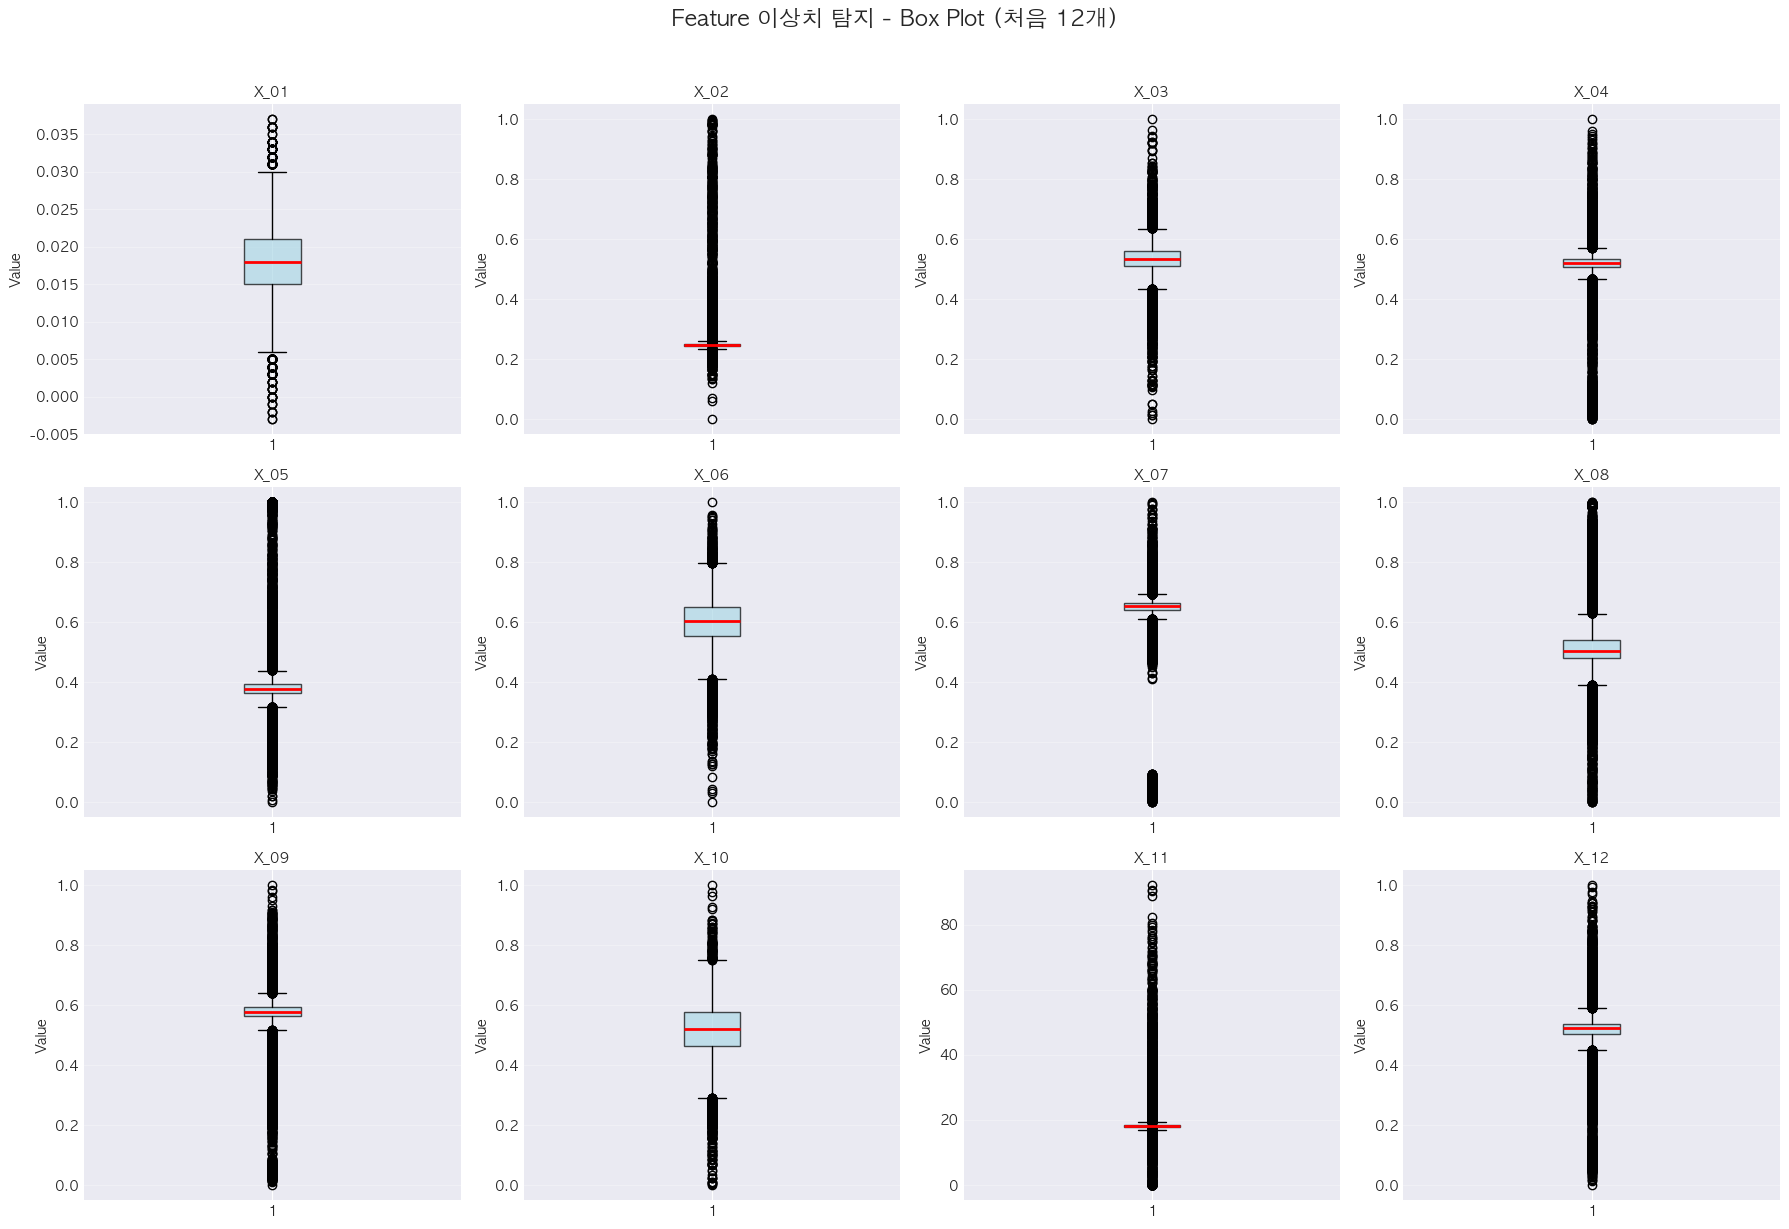


이상치가 많은 상위 10개 Feature:
X_33    5541
X_07    5364
X_14    5349
X_36    5237
X_40    5154
X_41    4996
X_16    4865
X_22    4848
X_19    4751
X_20    4701
dtype: int64


In [22]:
# Feature 분포 분석 - Box Plot으로 이상치 탐지
feature_cols = [col for col in train.columns if col.startswith('X_')]

# 처음 12개 Feature의 Box Plot
fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(feature_cols[:12]):
    bp = axes[idx].boxplot(train[col], patch_artist=True, 
                          boxprops=dict(facecolor='lightblue', alpha=0.7),
                          medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(f'{col}', fontsize=10, fontweight='bold')
    axes[idx].set_ylabel('Value')
    axes[idx].grid(axis='y', alpha=0.3)

plt.suptitle('Feature 이상치 탐지 - Box Plot (처음 12개)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# 이상치 개수 계산 (IQR 방법)
outlier_counts = {}
for col in feature_cols:
    Q1 = train[col].quantile(0.25)
    Q3 = train[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_counts[col] = ((train[col] < lower_bound) | (train[col] > upper_bound)).sum()

outlier_df = pd.Series(outlier_counts).sort_values(ascending=False)
print(f"\n이상치가 많은 상위 10개 Feature:")
print(outlier_df.head(10))


## 5. 상관관계 분석


상관관계 분석

높은 상관관계(|r| > 0.8)를 가진 Feature 쌍: 54개

상위 10개:
  X_06 <-> X_45: 1.0000
  X_10 <-> X_17: 1.0000
  X_26 <-> X_30: 0.9985
  X_05 <-> X_25: 0.9982
  X_38 <-> X_47: 0.9975
  X_07 <-> X_33: 0.9935
  X_20 <-> X_22: 0.9925
  X_04 <-> X_39: 0.9910
  X_09 <-> X_20: 0.9877
  X_05 <-> X_51: 0.9850


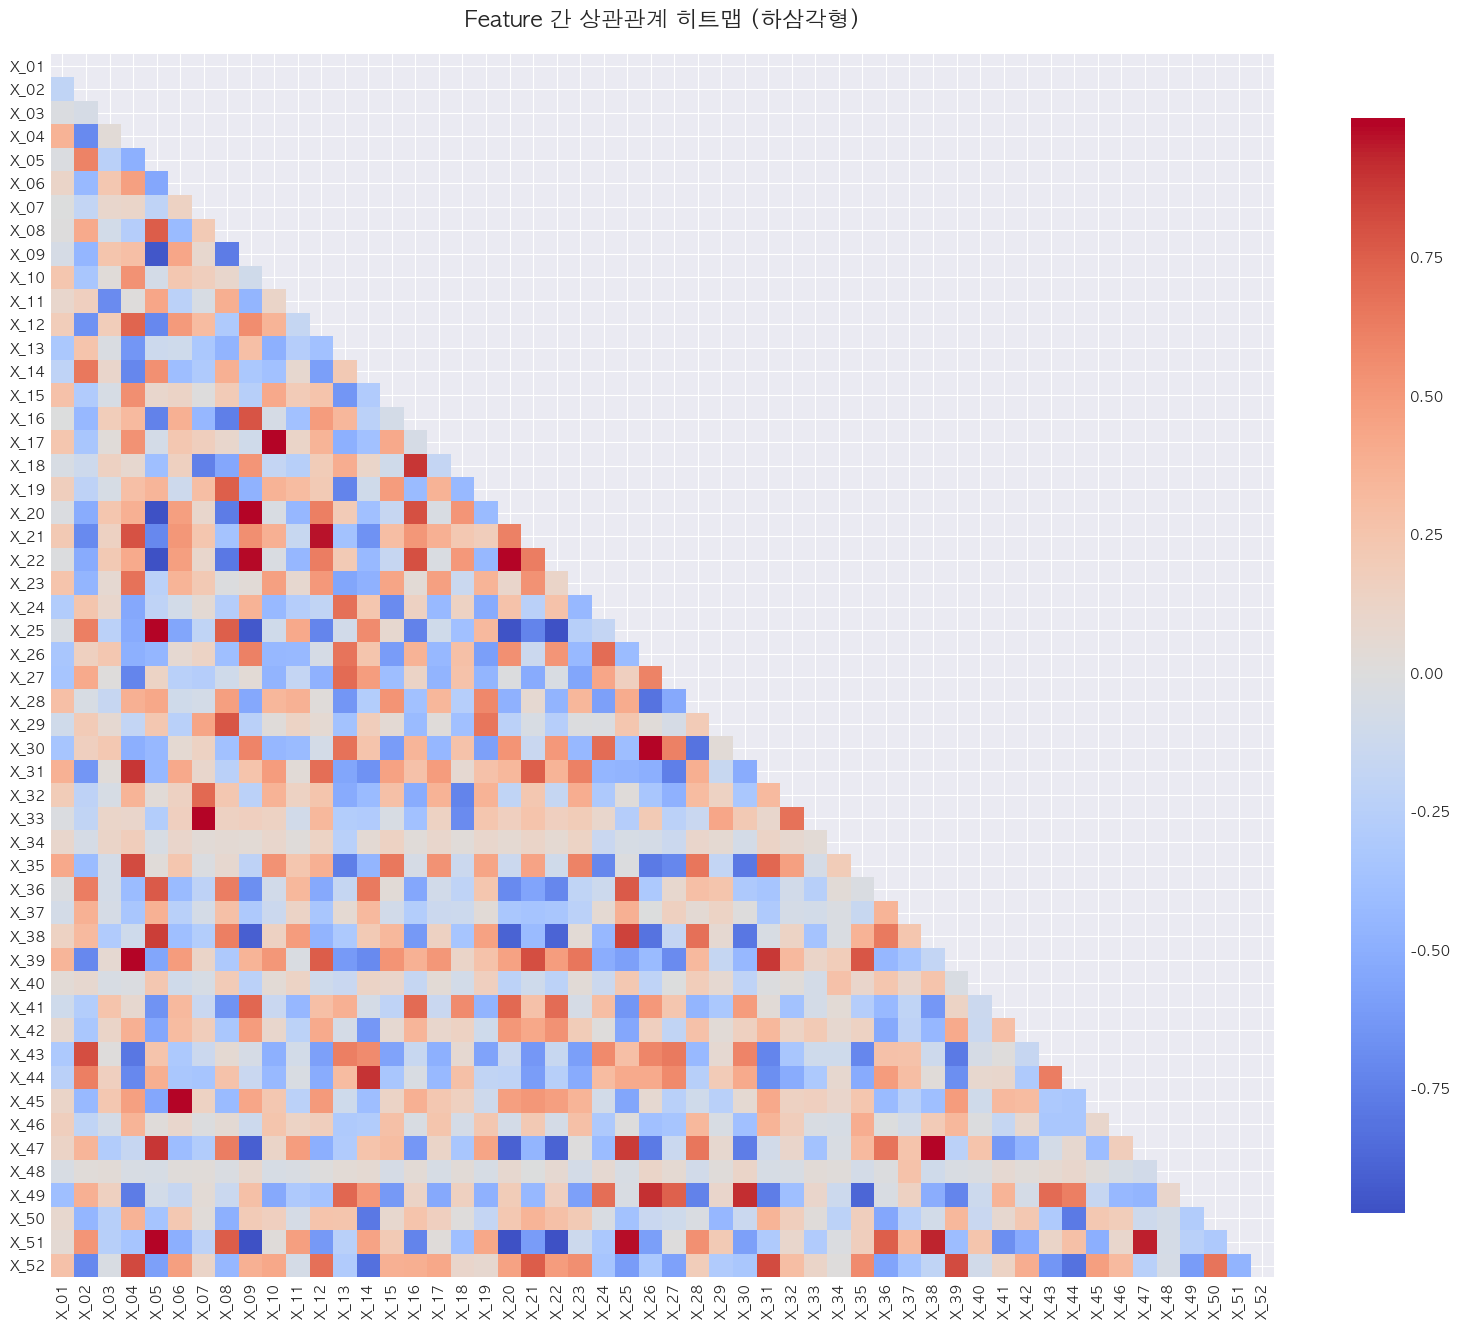

In [23]:
# Feature 간 상관관계 분석
feature_cols = [col for col in train.columns if col.startswith('X_')]
corr_matrix = train[feature_cols].corr()

# 전체 상관관계 히트맵 (52x52는 너무 크므로 샘플링 또는 축소)
# 상관관계가 높은 상위 쌍들만 먼저 확인
print("=" * 60)
print("상관관계 분석")
print("=" * 60)

# 상관관계 높은 쌍 찾기
high_corr_pairs = []
for i in range(len(feature_cols)):
    for j in range(i+1, len(feature_cols)):
        corr_val = corr_matrix.iloc[i, j]
        if abs(corr_val) > 0.8:
            high_corr_pairs.append((feature_cols[i], feature_cols[j], corr_val))

high_corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)

print(f"\n높은 상관관계(|r| > 0.8)를 가진 Feature 쌍: {len(high_corr_pairs)}개")
if high_corr_pairs:
    print("\n상위 10개:")
    for pair in high_corr_pairs[:10]:
        print(f"  {pair[0]} <-> {pair[1]}: {pair[2]:.4f}")

# 전체 히트맵 (크기 축소를 위해 일부만 표시)
fig, ax = plt.subplots(figsize=(16, 14))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=False, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": 0.8}, ax=ax)
plt.title('Feature 간 상관관계 히트맵 (하삼각형)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()


타겟과 Feature 간 상관관계

타겟과 가장 높은 상관관계를 가진 상위 15개 Feature:
X_28   -0.329630
X_46   -0.285657
X_33    0.266976
X_07    0.261217
X_42   -0.249615
X_30    0.211838
X_18   -0.209667
X_26    0.207368
X_43    0.182683
X_14    0.177215
X_35   -0.175724
X_15   -0.169645
X_16   -0.168374
X_41   -0.167014
X_49    0.166761
dtype: float64


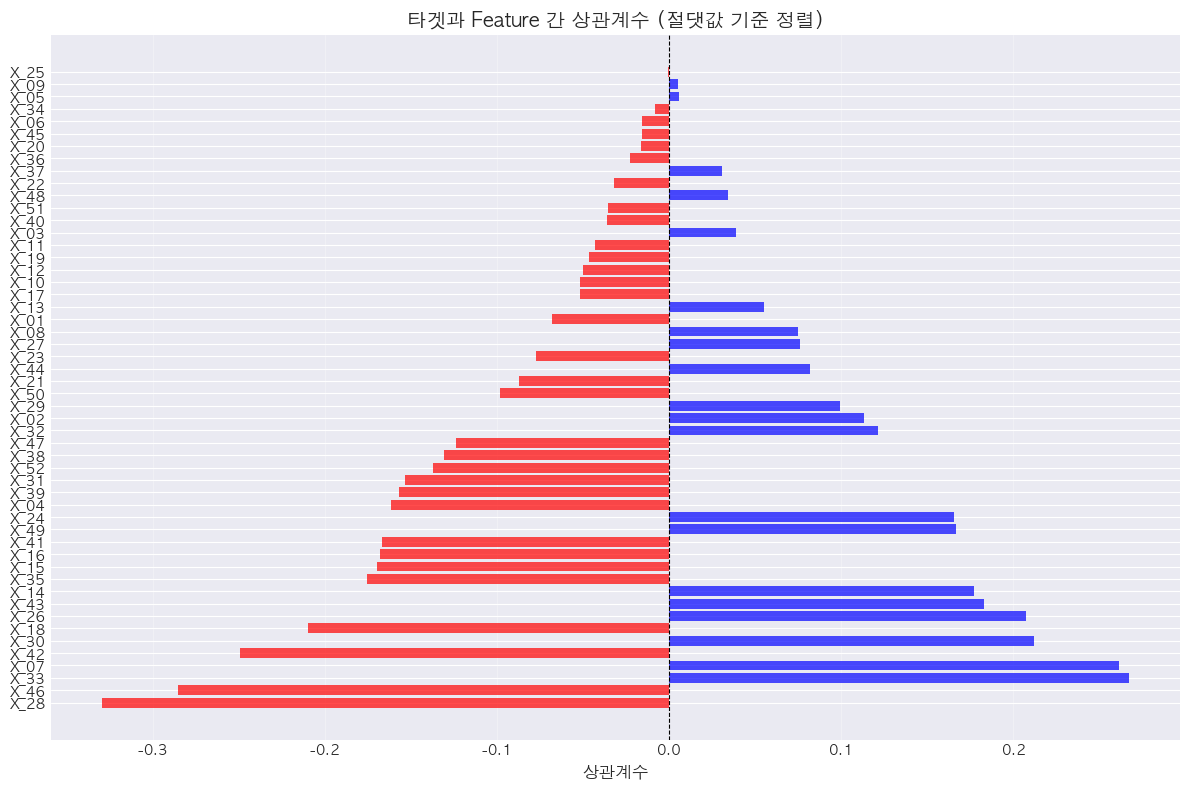

In [24]:
# 타겟과의 상관관계 분석
feature_cols = [col for col in train.columns if col.startswith('X_')]
target_corr = train[feature_cols].apply(lambda x: x.corr(train['target'])).sort_values(key=abs, ascending=False)

print("=" * 60)
print("타겟과 Feature 간 상관관계")
print("=" * 60)
print(f"\n타겟과 가장 높은 상관관계를 가진 상위 15개 Feature:")
print(target_corr.head(15))

# 시각화
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['red' if x < 0 else 'blue' for x in target_corr.values]
ax.barh(range(len(target_corr)), target_corr.values, color=colors, alpha=0.7)
ax.set_yticks(range(len(target_corr)))
ax.set_yticklabels(target_corr.index)
ax.set_xlabel('상관계수', fontsize=12)
ax.set_title('타겟과 Feature 간 상관계수 (절댓값 기준 정렬)', fontsize=14, fontweight='bold')
ax.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()


## 6. 클래스별 Feature 비교


클래스별 Feature 비교

비교 대상 Feature (타겟과 상관관계 상위 5개): ['X_28', 'X_46', 'X_33', 'X_07', 'X_42']

클래스별 평균값:
            X_28      X_46      X_33      X_07      X_42
target                                                  
0       0.246797  0.747367  0.640704  0.653649  0.250874
1       0.755438  0.755062  0.685341  0.700483  0.767960
2       0.276123  0.733993  0.038574  0.040548  0.280717
3       0.246297  0.744822  0.640339  0.653717  0.250323
4       0.246610  0.747541  0.640672  0.653816  0.250723
5       0.245447  0.745852  0.640296  0.653460  0.249513
6       0.999769  0.832854  0.430488  0.499073  0.000000
7       0.228918  0.740087  0.644239  0.656536  0.232695
8       0.245370  0.747110  0.666044  0.679246  0.249438
9       0.246335  0.747264  0.640269  0.653452  0.250412
10      0.246427  0.747698  0.640317  0.654084  0.250502
11      0.246226  0.747185  0.640023  0.653560  0.250299
12      0.238364  0.744392  0.635059  0.651318  0.242339
13      0.239855  0.749001  0.647978  0.6644

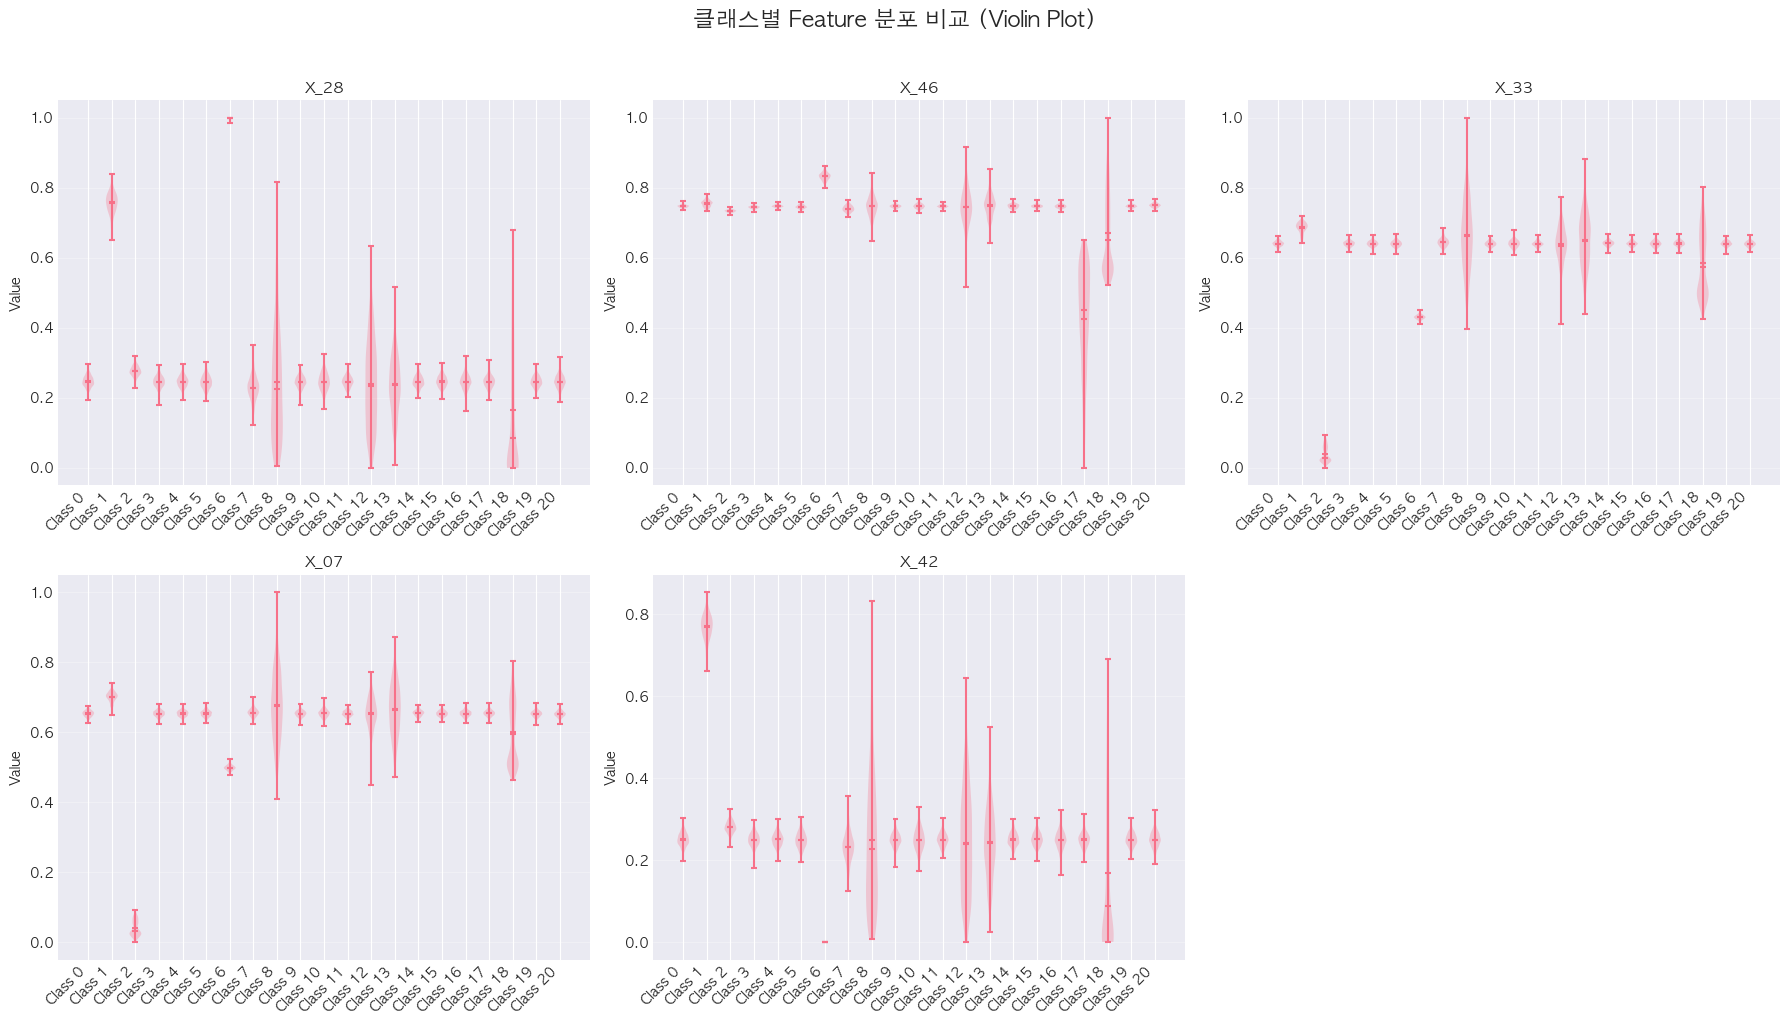

In [25]:
# 클래스별 주요 Feature 비교
feature_cols = [col for col in train.columns if col.startswith('X_')]

# 타겟과 상관관계가 높은 상위 5개 Feature를 선택
target_corr = train[feature_cols].apply(lambda x: x.corr(train['target'])).sort_values(key=abs, ascending=False)
top_features = target_corr.head(5).index.tolist()

print("=" * 60)
print("클래스별 Feature 비교")
print("=" * 60)
print(f"\n비교 대상 Feature (타겟과 상관관계 상위 5개): {top_features}")

# 클래스별 평균값 비교
class_means = train.groupby('target')[top_features].mean()
print("\n클래스별 평균값:")
print(class_means)

# 시각화
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, feat in enumerate(top_features):
    if idx < 5:
        # Violin plot
        data_to_plot = [train[train['target'] == cls][feat].values 
                        for cls in sorted(train['target'].unique())]
        axes[idx].violinplot(data_to_plot, positions=range(len(data_to_plot)), 
                            showmeans=True, showmedians=True)
        axes[idx].set_xticks(range(len(data_to_plot)))
        axes[idx].set_xticklabels([f"Class {i}" for i in sorted(train['target'].unique())], 
                                 rotation=45, ha='right')
        axes[idx].set_title(f'{feat}', fontsize=11, fontweight='bold')
        axes[idx].set_ylabel('Value')
        axes[idx].grid(axis='y', alpha=0.3)

axes[5].axis('off')  # 마지막 subplot 비활성화

plt.suptitle('클래스별 Feature 분포 비교 (Violin Plot)', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [26]:
# 통계적 검정 (ANOVA) - 클래스 간 차이가 유의한지 확인
feature_cols = [col for col in train.columns if col.startswith('X_')]
target_corr = train[feature_cols].apply(lambda x: x.corr(train['target'])).sort_values(key=abs, ascending=False)
top_features = target_corr.head(10).index.tolist()

print("=" * 60)
print("통계적 검정 (ANOVA) - 클래스 간 Feature 차이 유의성 검정")
print("=" * 60)

anova_results = {}
for feat in top_features:
    groups = [train[train['target'] == cls][feat].values 
              for cls in sorted(train['target'].unique())]
    f_stat, p_value = stats.f_oneway(*groups)
    anova_results[feat] = {'F-statistic': f_stat, 'p-value': p_value}

anova_df = pd.DataFrame(anova_results).T.sort_values('p-value')
print("\n상위 10개 Feature의 ANOVA 결과:")
print(anova_df)

# p-value가 매우 작은 (< 0.001) Feature들은 클래스 간 유의한 차이가 있음
significant_features = anova_df[anova_df['p-value'] < 0.001]
print(f"\n클래스 간 유의한 차이가 있는 Feature (p < 0.001): {len(significant_features)}개")
print(significant_features.index.tolist())


통계적 검정 (ANOVA) - 클래스 간 Feature 차이 유의성 검정

상위 10개 Feature의 ANOVA 결과:
       F-statistic  p-value
X_28   9339.184391      0.0
X_46   3046.738383      0.0
X_33  13619.318977      0.0
X_07  14103.815059      0.0
X_42   3982.611880      0.0
X_30   6242.892004      0.0
X_18  11228.037704      0.0
X_26   6512.391953      0.0
X_43    639.528005      0.0
X_14    742.970700      0.0

클래스 간 유의한 차이가 있는 Feature (p < 0.001): 10개
['X_28', 'X_46', 'X_33', 'X_07', 'X_42', 'X_30', 'X_18', 'X_26', 'X_43', 'X_14']


## 7. 차원 축소 시각화


PCA 차원 축소 분석

설명된 분산 비율:
- PC1: 0.3019 (30.19%)
- PC2: 0.2640 (26.40%)
- PC3: 0.0847 (8.47%)
- 누적: 0.6506 (65.06%)


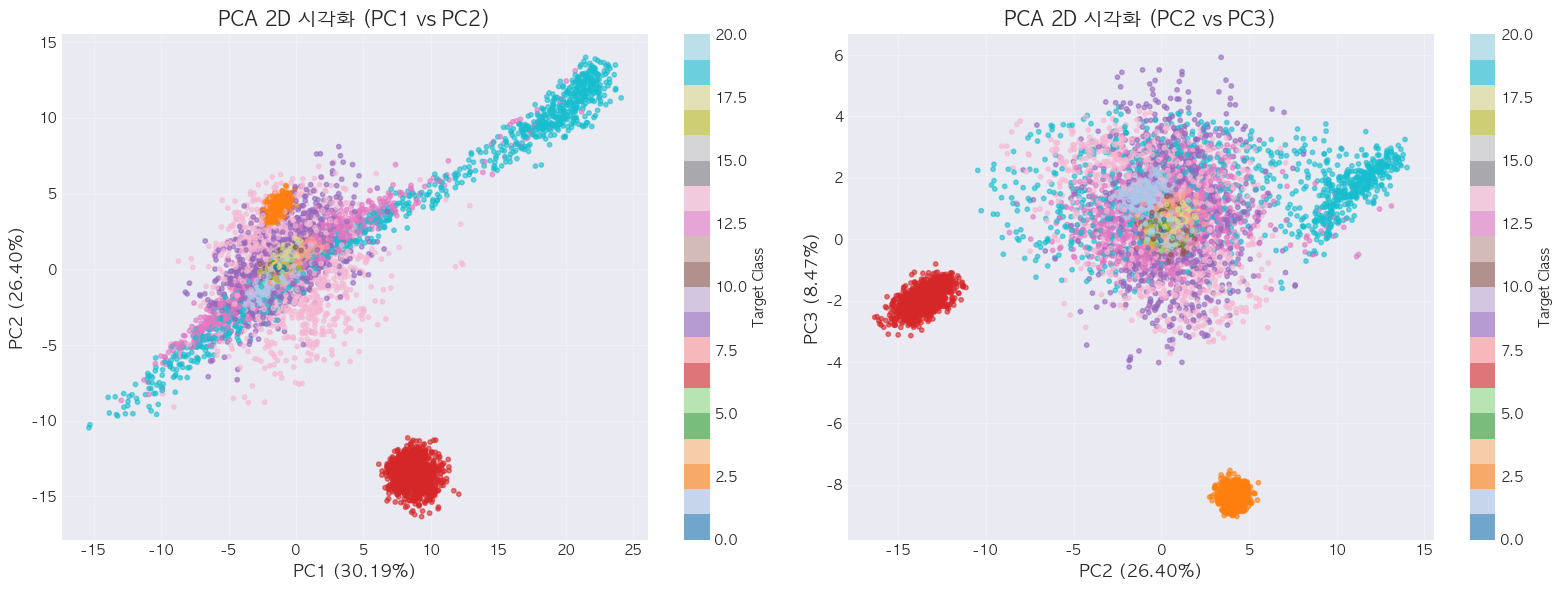

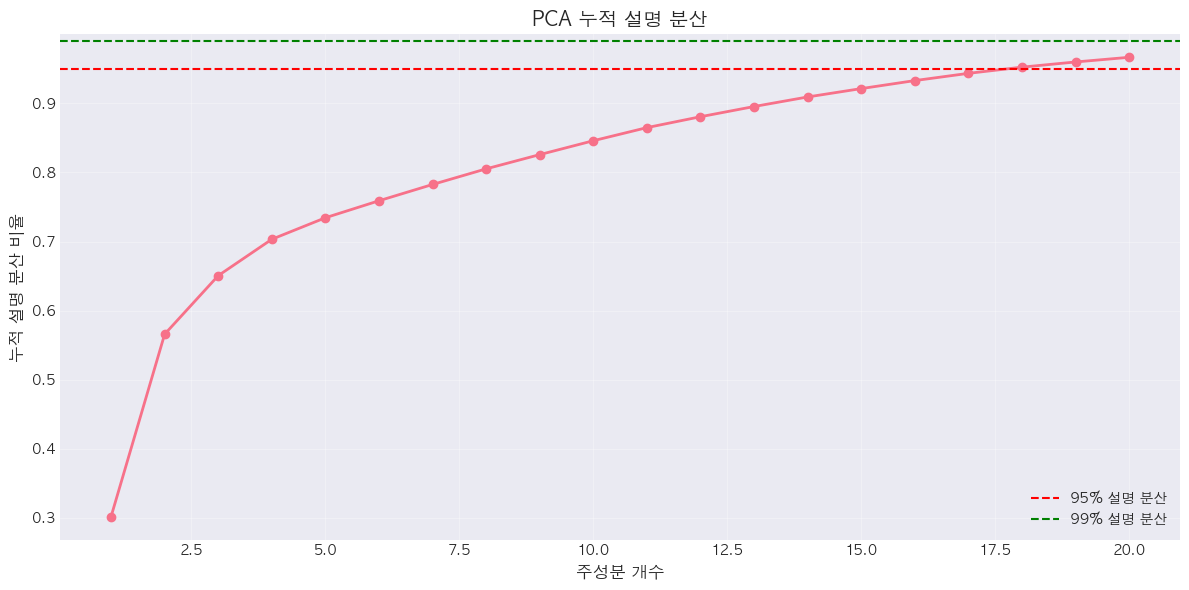


95% 설명 분산에 필요한 주성분 개수: 18
99% 설명 분산에 필요한 주성분 개수: 1


In [27]:
# PCA 차원 축소
feature_cols = [col for col in train.columns if col.startswith('X_')]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train[feature_cols])

# PCA 적용
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

print("=" * 60)
print("PCA 차원 축소 분석")
print("=" * 60)
print(f"\n설명된 분산 비율:")
print(f"- PC1: {pca.explained_variance_ratio_[0]:.4f} ({pca.explained_variance_ratio_[0]*100:.2f}%)")
print(f"- PC2: {pca.explained_variance_ratio_[1]:.4f} ({pca.explained_variance_ratio_[1]*100:.2f}%)")
print(f"- PC3: {pca.explained_variance_ratio_[2]:.4f} ({pca.explained_variance_ratio_[2]*100:.2f}%)")
print(f"- 누적: {pca.explained_variance_ratio_[:3].sum():.4f} ({pca.explained_variance_ratio_[:3].sum()*100:.2f}%)")

# 2D 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PC1 vs PC2
scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=train['target'], 
                         cmap='tab20', alpha=0.6, s=10)
axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=12)
axes[0].set_title('PCA 2D 시각화 (PC1 vs PC2)', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[0], label='Target Class')

# PC2 vs PC3
scatter = axes[1].scatter(X_pca[:, 1], X_pca[:, 2], c=train['target'], 
                         cmap='tab20', alpha=0.6, s=10)
axes[1].set_xlabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=12)
axes[1].set_ylabel(f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)', fontsize=12)
axes[1].set_title('PCA 2D 시각화 (PC2 vs PC3)', fontsize=14, fontweight='bold')
axes[1].grid(alpha=0.3)
plt.colorbar(scatter, ax=axes[1], label='Target Class')

plt.tight_layout()
plt.show()

# 누적 설명 분산 플롯
fig, ax = plt.subplots(figsize=(12, 6))
pca_full = PCA(n_components=min(20, len(feature_cols)))
pca_full.fit(X_scaled)
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)
ax.plot(range(1, len(cumsum_var)+1), cumsum_var, marker='o', linewidth=2, markersize=6)
ax.set_xlabel('주성분 개수', fontsize=12)
ax.set_ylabel('누적 설명 분산 비율', fontsize=12)
ax.set_title('PCA 누적 설명 분산', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
ax.axhline(y=0.95, color='r', linestyle='--', label='95% 설명 분산')
ax.axhline(y=0.99, color='g', linestyle='--', label='99% 설명 분산')
ax.legend()
plt.tight_layout()
plt.show()

# 95%, 99% 설명 분산에 필요한 주성분 개수
n_components_95 = np.argmax(cumsum_var >= 0.95) + 1
n_components_99 = np.argmax(cumsum_var >= 0.99) + 1
print(f"\n95% 설명 분산에 필요한 주성분 개수: {n_components_95}")
print(f"99% 설명 분산에 필요한 주성분 개수: {n_components_99}")


t-SNE 차원 축소 분석
원본 데이터: 21693개
샘플링 데이터: 4200개 (각 클래스당 최대 200개)


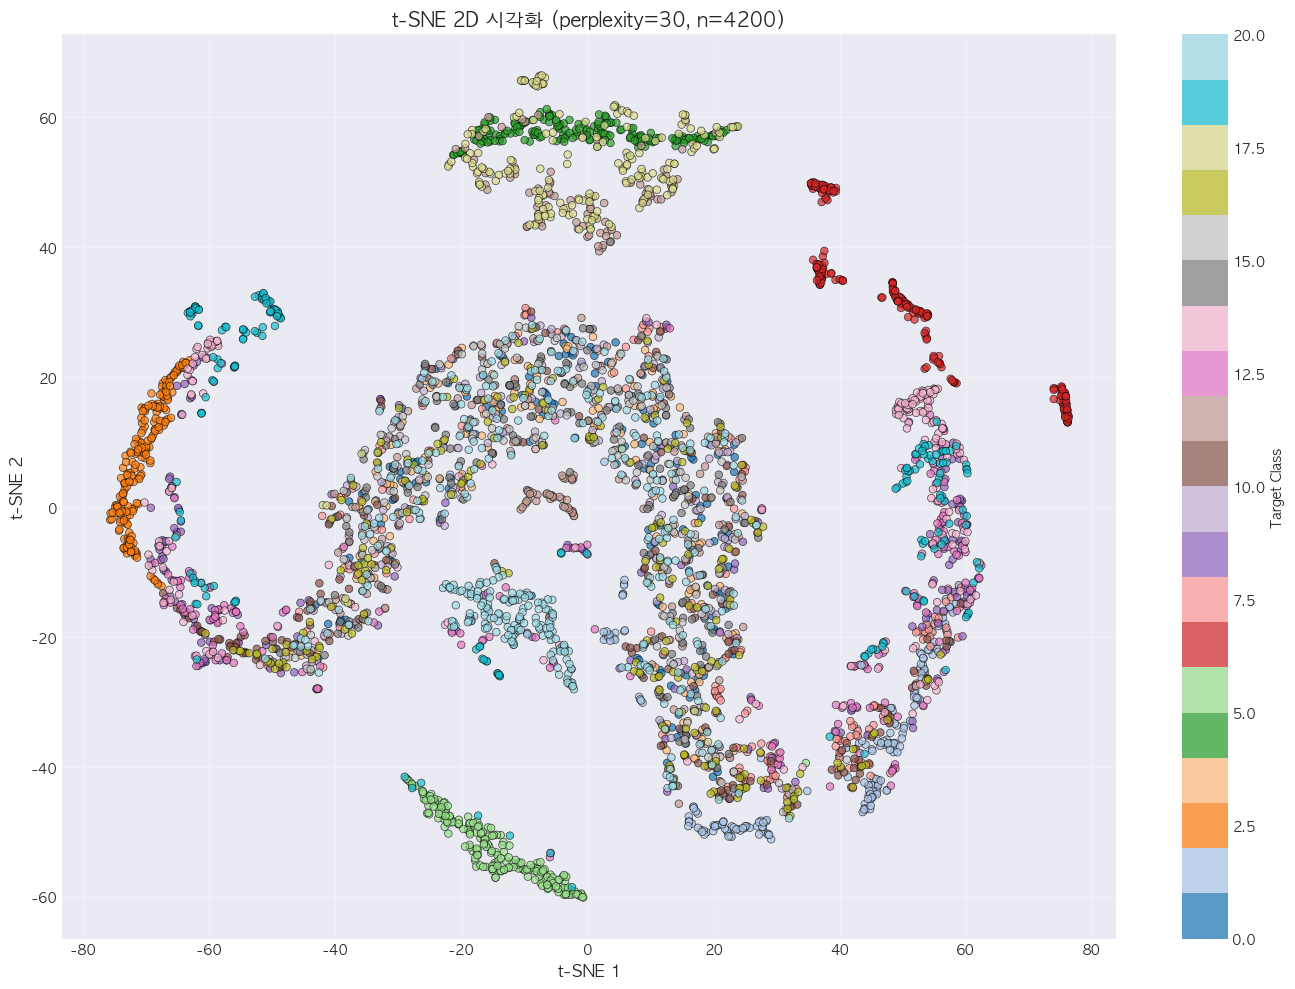


t-SNE는 비선형 관계를 보여주며, 클래스가 잘 분리되어 있는지 확인할 수 있습니다.


In [29]:
# t-SNE 차원 축소 (계산 시간이 오래 걸리므로 샘플링)
feature_cols = [col for col in train.columns if col.startswith('X_')]

# 데이터가 크면 샘플링 (각 클래스당 최대 200개)
sample_size = min(200, train['target'].value_counts().iloc[0])
sampled_indices = []
for cls in sorted(train['target'].unique()):
    cls_indices = train[train['target'] == cls].index.tolist()
    if len(cls_indices) > sample_size:
        sampled_indices.extend(np.random.choice(cls_indices, sample_size, replace=False).tolist())
    else:
        sampled_indices.extend(cls_indices)

train_sample = train.loc[sampled_indices].copy()
X_sample = train_sample[feature_cols].values

print("=" * 60)
print("t-SNE 차원 축소 분석")
print("=" * 60)
print(f"원본 데이터: {train.shape[0]}개")
print(f"샘플링 데이터: {len(sampled_indices)}개 (각 클래스당 최대 {sample_size}개)")

# t-SNE 적용 (perplexity는 샘플 크기에 맞게 조정)
perplexity = min(30, len(sampled_indices) // 3)
tsne = TSNE(n_components=2, random_state=42, perplexity=perplexity, max_iter=1000)
X_tsne = tsne.fit_transform(X_sample)

# 시각화
fig, ax = plt.subplots(figsize=(14, 10))
scatter = ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c=train_sample['target'], 
                    cmap='tab20', alpha=0.7, s=30, edgecolors='black', linewidth=0.5)
ax.set_xlabel('t-SNE 1', fontsize=12)
ax.set_ylabel('t-SNE 2', fontsize=12)
ax.set_title(f't-SNE 2D 시각화 (perplexity={perplexity}, n={len(sampled_indices)})', 
            fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax, label='Target Class')
plt.tight_layout()
plt.show()

print("\nt-SNE는 비선형 관계를 보여주며, 클래스가 잘 분리되어 있는지 확인할 수 있습니다.")


## 8. Feature 중요도 분석


RandomForest Feature Importance 분석

상위 20개 중요 Feature:
   feature  importance
39    X_40    0.085794
10    X_11    0.055796
45    X_46    0.054812
35    X_36    0.053452
33    X_34    0.039198
41    X_42    0.033946
40    X_41    0.033370
36    X_37    0.031114
27    X_28    0.030204
6     X_07    0.029450
7     X_08    0.028495
18    X_19    0.027489
32    X_33    0.026745
29    X_30    0.021326
15    X_16    0.020149
28    X_29    0.019797
17    X_18    0.019768
50    X_51    0.018157
48    X_49    0.017498
25    X_26    0.017264


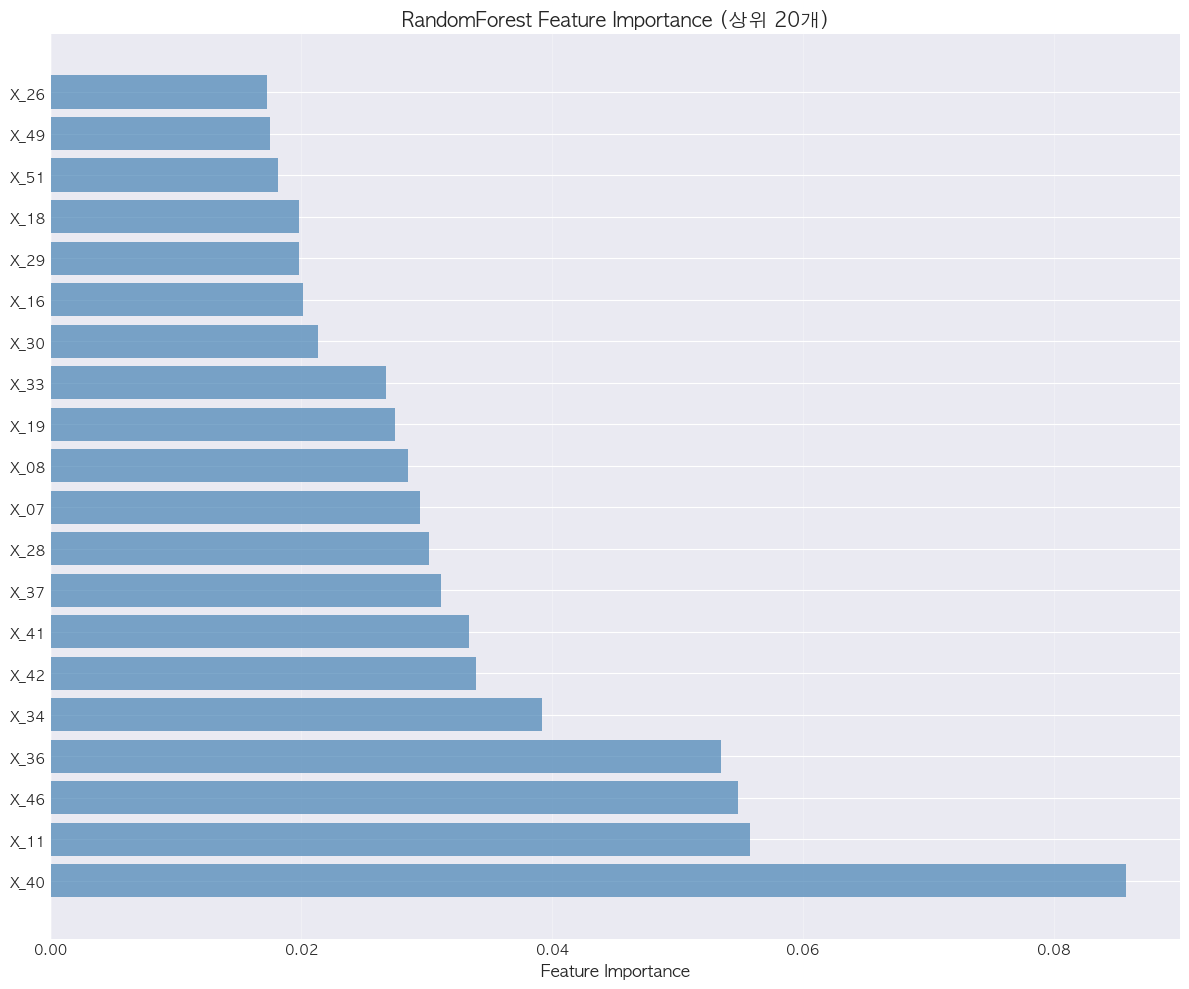

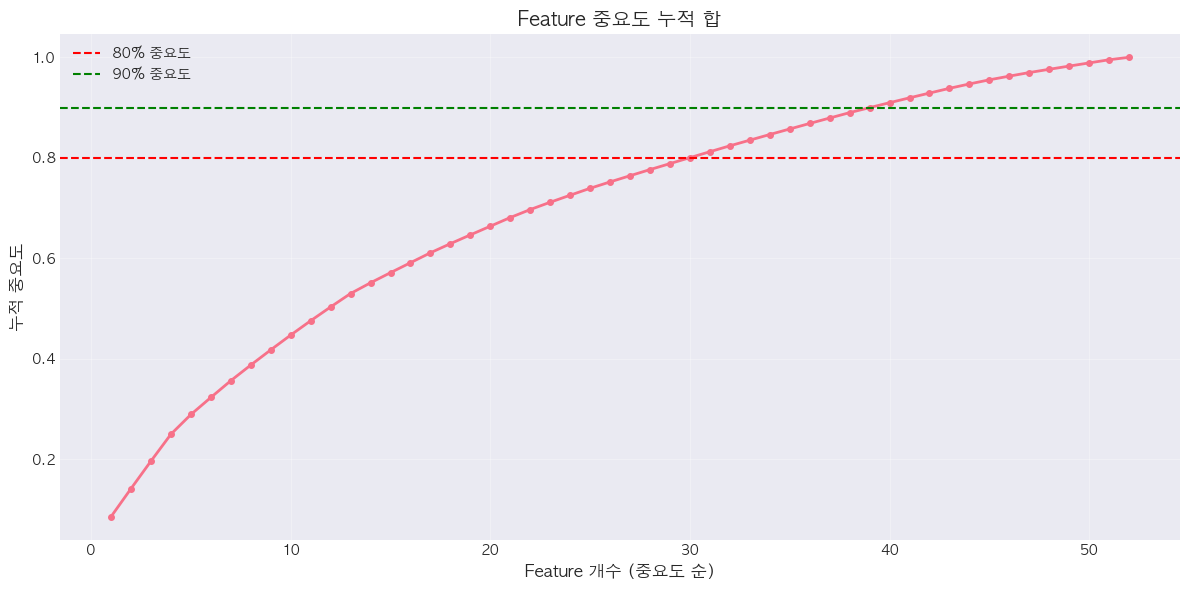


80% 중요도에 필요한 Feature 개수: 30
90% 중요도에 필요한 Feature 개수: 40

상위 30개 Feature 리스트:
['X_40', 'X_11', 'X_46', 'X_36', 'X_34', 'X_42', 'X_41', 'X_37', 'X_28', 'X_07', 'X_08', 'X_19', 'X_33', 'X_30', 'X_16', 'X_29', 'X_18', 'X_51', 'X_49', 'X_26', 'X_14', 'X_48', 'X_22', 'X_38', 'X_04', 'X_44', 'X_09', 'X_25', 'X_05', 'X_39']


In [30]:
# RandomForest를 활용한 Feature Importance 계산
feature_cols = [col for col in train.columns if col.startswith('X_')]

print("=" * 60)
print("RandomForest Feature Importance 분석")
print("=" * 60)

# RandomForest 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=0)
rf_model.fit(train[feature_cols], train['target'])

# Feature Importance 추출
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\n상위 20개 중요 Feature:")
print(feature_importance.head(20))

# 시각화
fig, ax = plt.subplots(figsize=(12, 10))
top_n = 20
top_features = feature_importance.head(top_n)
ax.barh(range(len(top_features)), top_features['importance'].values, color='steelblue', alpha=0.7)
ax.set_yticks(range(len(top_features)))
ax.set_yticklabels(top_features['feature'].values)
ax.set_xlabel('Feature Importance', fontsize=12)
ax.set_title(f'RandomForest Feature Importance (상위 {top_n}개)', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# 중요도 누적 합
cumsum_importance = np.cumsum(feature_importance['importance'].values)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(range(1, len(cumsum_importance)+1), cumsum_importance, marker='o', linewidth=2, markersize=4)
ax.set_xlabel('Feature 개수 (중요도 순)', fontsize=12)
ax.set_ylabel('누적 중요도', fontsize=12)
ax.set_title('Feature 중요도 누적 합', fontsize=14, fontweight='bold')
ax.grid(alpha=0.3)
ax.axhline(y=0.8, color='r', linestyle='--', label='80% 중요도')
ax.axhline(y=0.9, color='g', linestyle='--', label='90% 중요도')
ax.legend()
plt.tight_layout()
plt.show()

# 80%, 90% 중요도에 필요한 Feature 개수
n_features_80 = np.argmax(cumsum_importance >= 0.8) + 1
n_features_90 = np.argmax(cumsum_importance >= 0.9) + 1
print(f"\n80% 중요도에 필요한 Feature 개수: {n_features_80}")
print(f"90% 중요도에 필요한 Feature 개수: {n_features_90}")
print(f"\n상위 {n_features_80}개 Feature 리스트:")
print(feature_importance.head(n_features_80)['feature'].tolist())


## 9. 주요 인사이트 및 다음 단계

### 주요 발견사항 요약


In [31]:
# 주요 인사이트 정리
print("=" * 60)
print("주요 인사이트 및 다음 단계")
print("=" * 60)

print("\n[데이터 개요]")
print(f"- 총 샘플 수: {train.shape[0]:,}개")
print(f"- Feature 수: {len([col for col in train.columns if col.startswith('X_')])}개")
print(f"- 타겟 클래스 수: {train['target'].nunique()}개 (0-20)")
print(f"- 클래스 균형: 모든 클래스가 동일한 개수로 균형잡혀 있음")

feature_cols = [col for col in train.columns if col.startswith('X_')]
print(f"\n[Feature 특성]")
print(f"- 결측치: 없음")
print(f"- Feature 범위: 대부분 0-1 사이로 정규화되어 있음")
print(f"- Feature 간 높은 상관관계: 일부 Feature들이 강한 상관관계를 보임")

print(f"\n[차원 축소 분석]")
pca_full = PCA(n_components=20)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train[feature_cols])
pca_full.fit(X_scaled)
cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)
n_components_95 = np.argmax(cumsum_var >= 0.95) + 1
print(f"- PCA로 95% 분산 설명에 필요한 주성분: 약 {n_components_95}개")
print(f"- 차원 축소 가능성: 높음")

print(f"\n[Feature 중요도]")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=0)
rf_model.fit(train[feature_cols], train['target'])
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
cumsum_importance = np.cumsum(feature_importance['importance'].values)
n_features_80 = np.argmax(cumsum_importance >= 0.8) + 1
print(f"- RandomForest 기준 상위 {n_features_80}개 Feature가 80% 중요도 차지")
print(f"- 중요 Feature들이 클래스 구분에 핵심적 역할")


주요 인사이트 및 다음 단계

[데이터 개요]
- 총 샘플 수: 21,693개
- Feature 수: 52개
- 타겟 클래스 수: 21개 (0-20)
- 클래스 균형: 모든 클래스가 동일한 개수로 균형잡혀 있음

[Feature 특성]
- 결측치: 없음
- Feature 범위: 대부분 0-1 사이로 정규화되어 있음
- Feature 간 높은 상관관계: 일부 Feature들이 강한 상관관계를 보임

[차원 축소 분석]
- PCA로 95% 분산 설명에 필요한 주성분: 약 18개
- 차원 축소 가능성: 높음

[Feature 중요도]
- RandomForest 기준 상위 30개 Feature가 80% 중요도 차지
- 중요 Feature들이 클래스 구분에 핵심적 역할


### Feature Engineering 아이디어

1. **Feature 선택**
   - RandomForest Feature Importance 상위 N개 선택
   - 상관관계가 높은 Feature 쌍 중 하나 제거 (다중공선성 감소)
   - ANOVA p-value가 작은 Feature 우선 선택

2. **Feature 생성**
   - Feature 간 산술 연산 (곱, 나눗셈, 차이 등)
   - 통계적 특징 (평균, 표준편차, 최대/최소값 등)
   - Feature 간 비율

3. **차원 축소**
   - PCA를 통한 주성분 추출
   - Feature Selection 기법 활용

4. **정규화/스케일링**
   - StandardScaler 또는 MinMaxScaler 적용
   - RobustScaler (이상치에 강건)

### 모델링 전략 제안

1. **베이스라인 모델**
   - RandomForest (현재 Feature Importance 계산에 사용)
   - XGBoost / LightGBM
   - Neural Network

2. **앙상블 전략**
   - 여러 모델의 앙상블 (Voting, Stacking)
   - Cross-validation을 통한 robust한 평가

3. **평가 지표**
   - Macro-F1 Score (대회 평가 지표)
   - Confusion Matrix 분석
   - 클래스별 Precision, Recall 확인

4. **교차 검증**
   - Stratified K-Fold (클래스 균형 유지)
   - 시계열 특성이 있다면 TimeSeriesSplit 고려

5. **하이퍼파라미터 튜닝**
   - GridSearch / RandomSearch
   - Optuna 등 베이지안 최적화 도구 활용


In [32]:
# 다음 단계를 위한 Feature 목록 저장 (선택사항)
feature_cols = [col for col in train.columns if col.startswith('X_')]
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, verbose=0)
rf_model.fit(train[feature_cols], train['target'])
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

# 상위 30개 Feature 저장 (나중에 사용할 수 있도록)
top_features = feature_importance.head(30)['feature'].tolist()
print(f"상위 30개 중요 Feature:")
print(top_features)

# Feature 중요도 데이터프레임 저장 (선택사항)
# feature_importance.to_csv('feature_importance.csv', index=False)


상위 30개 중요 Feature:
['X_40', 'X_11', 'X_46', 'X_36', 'X_34', 'X_42', 'X_41', 'X_37', 'X_28', 'X_07', 'X_08', 'X_19', 'X_33', 'X_30', 'X_16', 'X_29', 'X_18', 'X_51', 'X_49', 'X_26', 'X_14', 'X_48', 'X_22', 'X_38', 'X_04', 'X_44', 'X_09', 'X_25', 'X_05', 'X_39']
